# 1. Các thư viện được sử dụng

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential

from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model
from scipy.stats import zscore

from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# 2. Load các tập dataset

In [2]:
# Đường dẫn tới thư mục chứa các dataset
data_dir = 'data'

# Lấy danh sách các tệp CSV trong thư mục
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Đếm số lượng tệp CSV
num_files = len(csv_files)

print(f"Số lượng tệp CSV trong thư mục 'data': {num_files}")

Số lượng tệp CSV trong thư mục 'data': 8


In [3]:
df15_raw = pd.read_csv('./data/2015.csv')
df16_raw = pd.read_csv('./data/2016.csv')
df17_raw = pd.read_csv('./data/2017.csv')
df18_raw = pd.read_csv('./data/2018.csv')
df19_raw = pd.read_csv('./data/2019.csv')
df20_raw = pd.read_csv('./data/2020.csv')
df21_raw = pd.read_csv('./data/2021.csv')
df22_raw = pd.read_csv('./data/2022.csv')

In [4]:
display(df15_raw.head(5))

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
display(df16_raw.head(5))

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
display(df17_raw.head(5))

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [7]:
display(df18_raw.head(5))

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [8]:
display(df19_raw.head(5))

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [9]:
display(df20_raw.head(5))

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [10]:
display(df21_raw.head(5))

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [11]:
display(df22_raw.head(5))

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


# 3. Tiền xử lý dữ liệu

## 3.1. Tiến hành tích hợp tất cả các tập dữ liệu

### 3.1.1. Kiểm tra các cột ở tất cả các tập dataset

In [12]:
df15_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [13]:
df16_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [14]:
df17_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [15]:
df18_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [16]:
df19_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [17]:
df20_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

In [18]:
df21_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [19]:
df22_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   RANK                                        147 non-null    int64 
 1   Country                                     147 non-null    object
 2   Happiness score                             146 non-null    object
 3   Whisker-high                                146 non-null    object
 4   Whisker-low                                 146 non-null    object
 5   Dystopia (1.83) + residual                  146 non-null    object
 6   Explained by: GDP per capita                146 non-null    object
 7   Explained by: Social support                146 non-null    object
 8   Explained by: Healthy life expectancy       146 non-null    object
 9   Explained by: Freedom to make life choices  146 non-null    object
 10  Explained by: Generosity  

- Có thể thấy rằng, chỉ duy nhất tập dataset 2022.csv là các cột thuộc tính đều là dạng object, tiến hành xử lý các cột này để dễ dàng tích hợp dữ liệu

In [20]:
display(df22_raw.head(3))

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"


In [21]:
# Chuẩn hóa các giá trị trong các cột từ object về float64 và thay thế dấu ',' bằng dấu '.'
for column in df22_raw.columns:
    if column not in ["RANK", "Country"]:
        df22_raw[column] = df22_raw[column].str.replace(',', '.').astype('float64')

In [22]:
df22_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        147 non-null    int64  
 1   Country                                     147 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [23]:
display(df22_raw.head(3))

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191


### 3.1.2. Trích lọc các cột cần thiết ở các tập dataset

In [24]:
df15_raw['year']=2015

d15=df15_raw[['Country', 'Happiness Score',
            'Economy (GDP per Capita)', 'Family',
            'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
            'Generosity','year']]

In [25]:
df16_raw['year']=2016

d16=df16_raw[['Country', 'Happiness Score',
            'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
            'Freedom', 'Trust (Government Corruption)', 'Generosity','year']]

In [26]:
df17_raw['year']=2017

d17=df17_raw[['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
            'Health..Life.Expectancy.', 'Freedom',
            'Trust..Government.Corruption.','Generosity','year']]

In [27]:
df18_raw['year']=2018

d18=df18_raw[['Country or region', 'Score', 'GDP per capita',
            'Social support', 'Healthy life expectancy',
            'Freedom to make life choices','Perceptions of corruption', 'Generosity','year']]

In [28]:
df19_raw['year']=2019

d19=df19_raw[[ 'Country or region', 'Score', 'GDP per capita',
            'Social support', 'Healthy life expectancy',
            'Freedom to make life choices','Perceptions of corruption', 'Generosity','year']]

In [29]:
df20_raw['year']=2020

d20=df20_raw[['Country name', 'Ladder score','Explained by: Log GDP per capita', 'Explained by: Social support',
              'Explained by: Healthy life expectancy',
              'Explained by: Freedom to make life choices','Explained by: Perceptions of corruption',
              'Explained by: Generosity','year' ]]

In [30]:
df21_raw['year']=2021

d21 = df21_raw[['Country name', 'Ladder score', 'Explained by: Log GDP per capita',
                'Explained by: Social support', 'Explained by: Healthy life expectancy',
                'Explained by: Freedom to make life choices', 'Explained by: Perceptions of corruption',
                'Explained by: Generosity', 'year']]

In [31]:
df22_raw['year']=2022

d22 = df22_raw[['Country', 'Happiness score', 'Explained by: GDP per capita',
                'Explained by: Social support', 'Explained by: Healthy life expectancy',
                'Explained by: Freedom to make life choices', 'Explained by: Perceptions of corruption',
                'Explained by: Generosity', 'year']]

### 3.1.3. Thay đổi tên các cột để thống nhất trên tập dữ liệu

In [32]:
def rename_columns_to_match(df_to_rename, reference_df):
    ref_columns = reference_df.columns
    target_columns = df_to_rename.columns
    renamed_columns = {target: ref for ref, target in zip(ref_columns, target_columns)}
    return df_to_rename.rename(columns=renamed_columns)

In [33]:
d17 = rename_columns_to_match(d17, d15)
d18 = rename_columns_to_match(d18, d15)
d19 = rename_columns_to_match(d19, d15)
d20 = rename_columns_to_match(d20, d15)
d21 = rename_columns_to_match(d21, d15)
d22 = rename_columns_to_match(d22, d15)

### 3.1.4. Tích hợp dữ liệu

In [34]:
df_raw = pd.concat([d15,d16,d17,d18,d19,d20, d21, d22],axis=0)

In [35]:
display(df_raw.head(5))

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [36]:
display(df_raw.tail(5))

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
142,Rwanda*,3.268,0.785,0.133,0.462,0.621,0.544,0.187,2022
143,Zimbabwe,2.995,0.947,0.690,0.270,0.329,0.105,0.106,2022
144,Lebanon,2.955,1.392,0.498,0.631,0.103,0.034,0.082,2022
145,Afghanistan,2.404,0.758,0.000,0.289,0.000,0.005,0.089,2022
146,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022


## 3.2. Xử lý dữ liệu bị thiếu

In [37]:
print("Số dòng x cột của tập dataframe hiện tại:")
display(df_raw.shape)

# Đếm số lượng dòng dữ liệu có cột bị NULL hoặc rỗng
num_rows_with_null = len(df_raw[df_raw.isnull().any(axis=1)])

print(f"Số lượng dòng dữ liệu có cột bị NULL hoặc rỗng: {num_rows_with_null}")


Số dòng x cột của tập dataframe hiện tại:


(1231, 9)

Số lượng dòng dữ liệu có cột bị NULL hoặc rỗng: 2


- Số lượng dòng dữ liệu bị thiếu sau khi tích hợp dữ liệu là không đáng kể, có thể loại bỏ dòng này

In [38]:
# Loại bỏ các dòng dữ liệu có cột bị NULL hoặc rỗng
df_cleaned = df_raw.dropna()

# Kiểm tra số lượng dòng dữ liệu sau khi loại bỏ
num_rows_after_cleaning = len(df_cleaned)

print(f"Số lượng dòng dữ liệu sau khi loại bỏ: {num_rows_after_cleaning}")

Số lượng dòng dữ liệu sau khi loại bỏ: 1229


## 3.3. Xử lý dữ liệu trùng lặp

In [39]:
# Kiểm tra và xem các dòng trùng lặp trong DataFrame
duplicate_rows = df_cleaned[df_cleaned.duplicated()]

# Hiển thị các dòng trùng lặp
print("Các dòng trùng lặp trong DataFrame:")
print(duplicate_rows)


Các dòng trùng lặp trong DataFrame:
Empty DataFrame
Columns: [Country, Happiness Score, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, year]
Index: []


In [40]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Score,1229.0,5.428998,1.115155,2.404,4.584,5.410000,6.223000,7.842000
Economy (GDP per Capita),1229.0,0.975343,0.434249,0.000,0.668,1.012160,1.295843,2.209000
Family,1229.0,1.033193,0.329578,0.000,0.828,1.069336,1.273850,1.644000
Health (Life Expectancy),1229.0,0.608082,0.241340,0.000,0.439,0.639333,0.790810,1.141000
Freedom,1229.0,0.440960,0.154412,0.000,0.345,0.459000,0.559000,0.740000
Trust (Government Corruption),1229.0,0.130756,0.110818,0.000,0.056,0.096000,0.164000,0.587000
Generosity,1229.0,0.201595,0.115568,0.000,0.118,0.187000,0.258538,0.838075
year,1229.0,2018.447518,2.283610,2015.000,2016.000,2018.000000,2020.000000,2022.000000


## 3.4. Trực quan hóa dữ liệu

- 5 quốc gia hàng đầu dựa trên Happiness Score

Text(0.5, 1.0, 'Top 5 Happiest Countries')

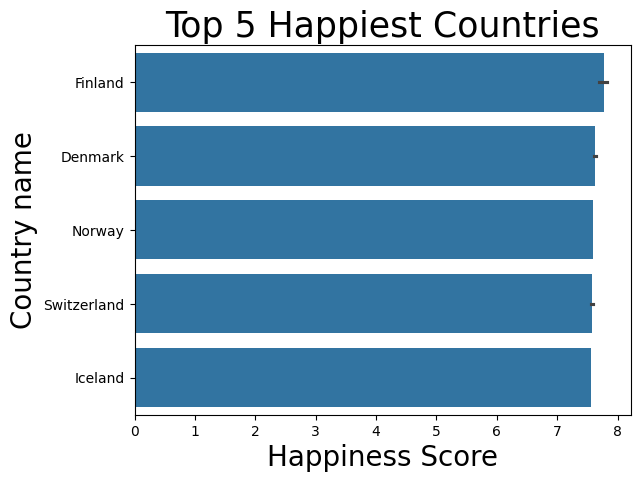

In [41]:
top = df_cleaned.sort_values(['Happiness Score'],ascending = 0)[:15]
ax = sns.barplot(x = 'Happiness Score' , y = 'Country' , data = top)
ax.set_xlabel('Happiness Score', size = 20)
ax.set_ylabel('Country name', size = 20)
ax.set_title("Top 5 Happiest Countries", size = 25)

**Nhận xét:** Quốc gia có chỉ số hạnh phúc cao nhất là Phần Lan

- GDP per Capita và Happiness Score

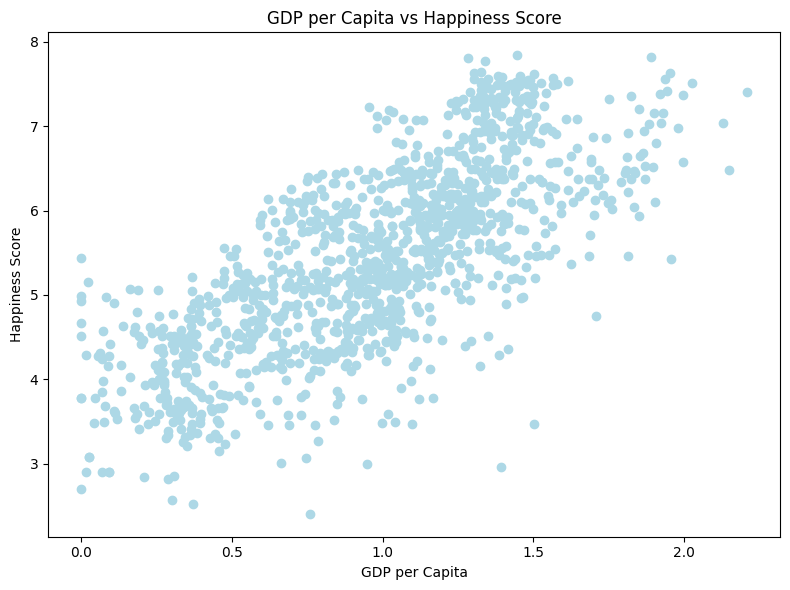

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['Economy (GDP per Capita)'], df_cleaned['Happiness Score'], color='lightblue')
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()


**Nhận xét:**
GDP per Capita thường được coi là một chỉ số đo lường tương đối cho mức độ phát triển kinh tế và chất lượng cuộc sống. Do đó, khi GDP per Capita tăng, có thể có nhiều cơ hội tăng cường chất lượng cuộc sống như quyền lợi xã hội, giáo dục, y tế, và an ninh, từ đó làm tăng sự hạnh phúc của cư dân.

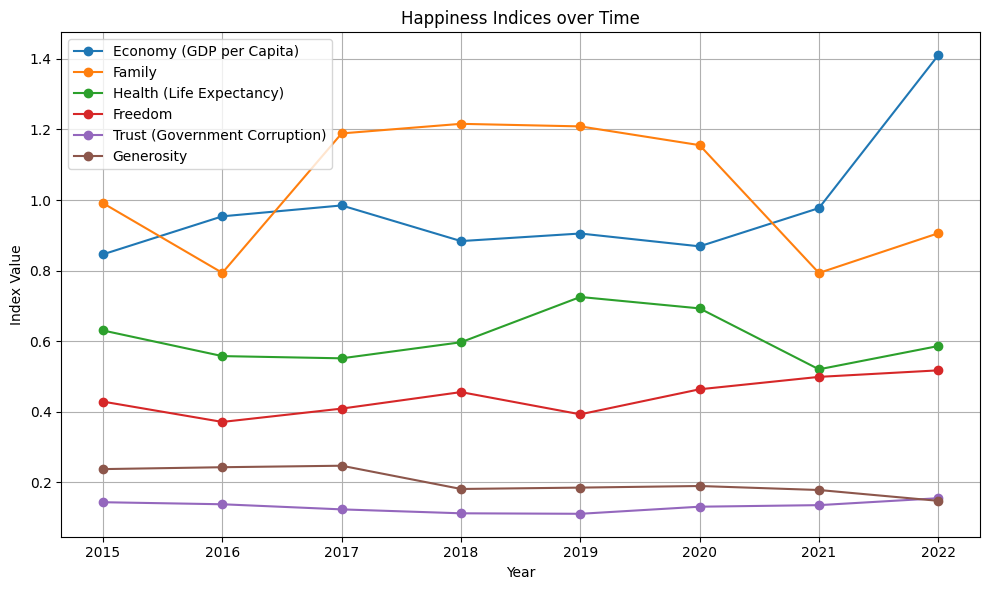

In [43]:
# Tạo một DataFrame mới chỉ chứa các chỉ số hạnh phúc và cột 'year'
df_happiness_indices = df_cleaned[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'year']]

# Groupby theo cột 'year' và tính trung bình cho mỗi chỉ số hạnh phúc
df_mean_indices = df_happiness_indices.groupby('year').mean()

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
for column in df_mean_indices.columns:
    plt.plot(df_mean_indices.index, df_mean_indices[column], marker='o', label=column)

plt.title('Happiness Indices over Time')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Nhận xét:**
- Có sự giảm rõ rệt ở Family và Health vào năm 2020 - 2021, có lẽ do sự tác động kinh tế và ảnh hưởng của đại dịch COVID-19 làm giảm khả năng của người dân trong việc tiếp cận dịch vụ y tế và hỗ trợ xã hội, ảnh hưởng đến Family và Health nên chỉ số Happiness cũng giảm
- Giai đoạn 2021 - 2022 là sau đại dịch, việc triển khai các biện pháp kích thích kinh tế như gói cứu trợ và hỗ trợ kinh tế có thể đã giúp khôi phục sản xuất và tiêu dùng, đáp ứng được nhiều nhu cầu của người dân nên chỉ số Happiness theo Family, Health, Economy của người dân đã tăng đáng kể

- phân phối các yếu tố ảnh hưởng đến Happiness

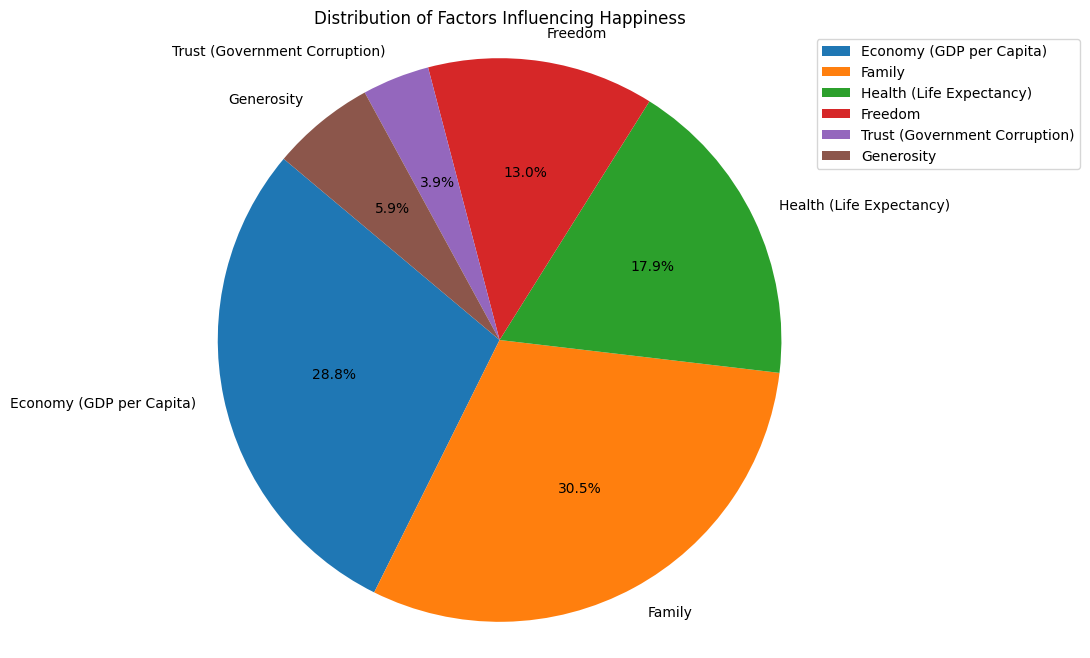

In [44]:
# Tính phần trăm của mỗi yếu tố
total_happiness = df_cleaned['Happiness Score'].sum()
percentage = df_cleaned[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']].sum() / total_happiness * 100

# Vẽ biểu đồ tròn
labels = percentage.index
sizes = percentage.values
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Factors Influencing Happiness')
plt.axis('equal')

# Tạo legend
plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

**Nhận xét:** Sự phân phối của các yếu tố ảnh hưởng đến Happiness Score được biểu diễn trong biểu đồ tròn cho thấy sự quan trọng của ba yếu tố chính là Family, Economy và Health đối với mức độ hạnh phúc của một quốc gia. Trong đó, Family đóng vai trò quan trọng nhất, tiếp theo là Economy và Health. Sự hài lòng trong mối quan hệ gia đình, thu nhập kinh tế và sức khỏe là những yếu tố cơ bản quyết định đến sự hạnh phúc và chất lượng cuộc sống của một quốc gia.

## 3.5. Xử lý thu giảm dữ liệu

In [45]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1229 entries, 0 to 145
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        1229 non-null   object 
 1   Happiness Score                1229 non-null   float64
 2   Economy (GDP per Capita)       1229 non-null   float64
 3   Family                         1229 non-null   float64
 4   Health (Life Expectancy)       1229 non-null   float64
 5   Freedom                        1229 non-null   float64
 6   Trust (Government Corruption)  1229 non-null   float64
 7   Generosity                     1229 non-null   float64
 8   year                           1229 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 96.0+ KB


In [46]:
# Chọn loại bỏ các cột không liên quan để thực hiện PCA
X = df_cleaned.drop(columns=['Country', 'year'])

In [47]:
# Khởi tạo PCA
pca = PCA()

# Fit PCA vào dữ liệu
pca.fit(X)

# Tính tỷ lệ phương sai giải thích bởi từng thành phần chính
explained_variance_ratio = pca.explained_variance_ratio_

# Tính tỷ lệ phương sai tích lũy
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

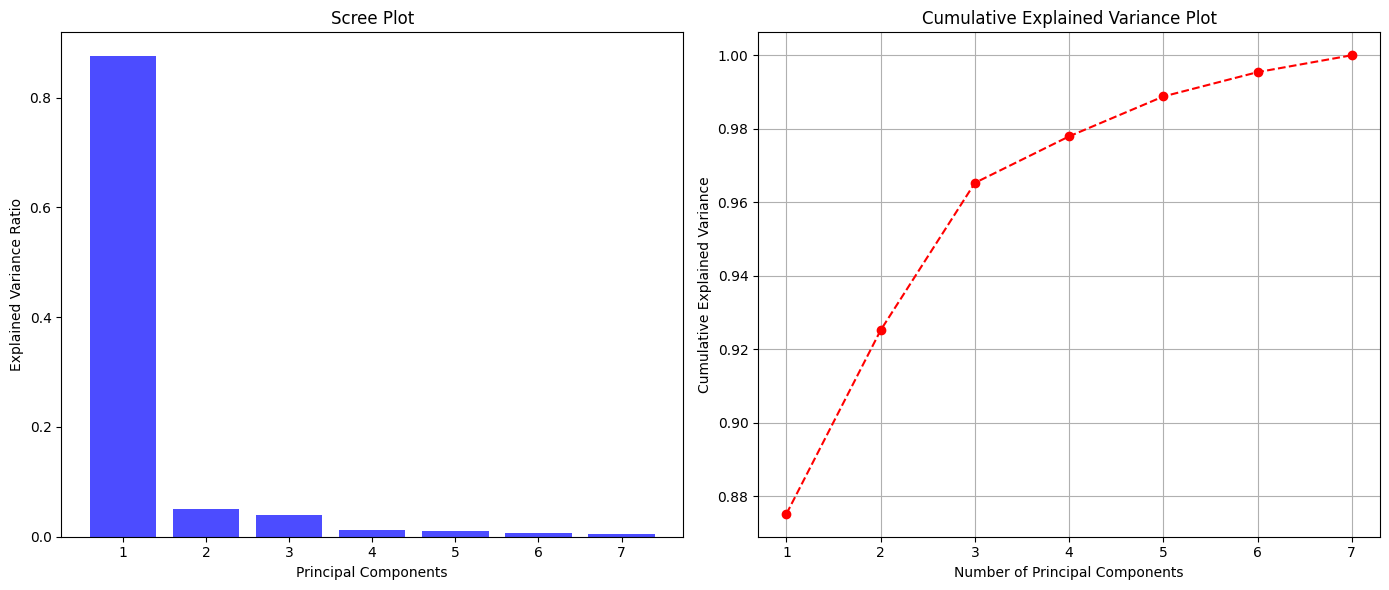

In [48]:
# Bước 3: Vẽ biểu đồ
plt.figure(figsize=(14, 6))

# Biểu đồ Scree Plot
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='b')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

# Biểu đồ tỷ lệ phương sai tích lũy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='r')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)

plt.tight_layout()
plt.show()

In [49]:
# Khởi tạo PCA với số thành phần chính mong muốn
pca = PCA(n_components=2)

# Fit và chuyển đổi dữ liệu
principal_components = pca.fit_transform(X)

# Xóa các dòng trùng lặp và reset lại chỉ số của DataFrame
df_cleaned_unique = df_cleaned.drop_duplicates(subset=['Country', 'year'], keep='first').reset_index(drop=True)

# Tạo DataFrame mới từ các thành phần chính
df_pca = pd.DataFrame(data=principal_components, columns=['Happiness Score_PCA', 'Economy (GDP per Capita)_PCA'])

# Ghép cột 'Country' và 'year' vào DataFrame PCA
df_pca[['Country', 'year',
        'Family', 'Health (Life Expectancy)', 'Freedom',
        'Trust (Government Corruption)', 'Generosity']] = df_cleaned_unique[['Country', 'year',
                                                                             'Family', 'Health (Life Expectancy)', 'Freedom',
                                                                             'Trust (Government Corruption)', 'Generosity']]

# Hiển thị DataFrame PCA
display(df_pca.head())

,Happiness Score_PCA,Economy (GDP per Capita)_PCA,Country,year,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,-2.252062,-0.256062,Switzerland,2015,1.34951,0.94143,0.66557,0.41978,0.29678
1,-2.199478,-0.337091,Iceland,2015,1.40223,0.94784,0.62877,0.14145,0.43630
2,-2.169540,-0.320642,Denmark,2015,1.36058,0.87464,0.64938,0.48357,0.34139
3,-2.196445,-0.200284,Norway,2015,1.33095,0.88521,0.66973,0.36503,0.34699
4,-2.068984,-0.296026,Canada,2015,1.32261,0.90563,0.63297,0.32957,0.45811


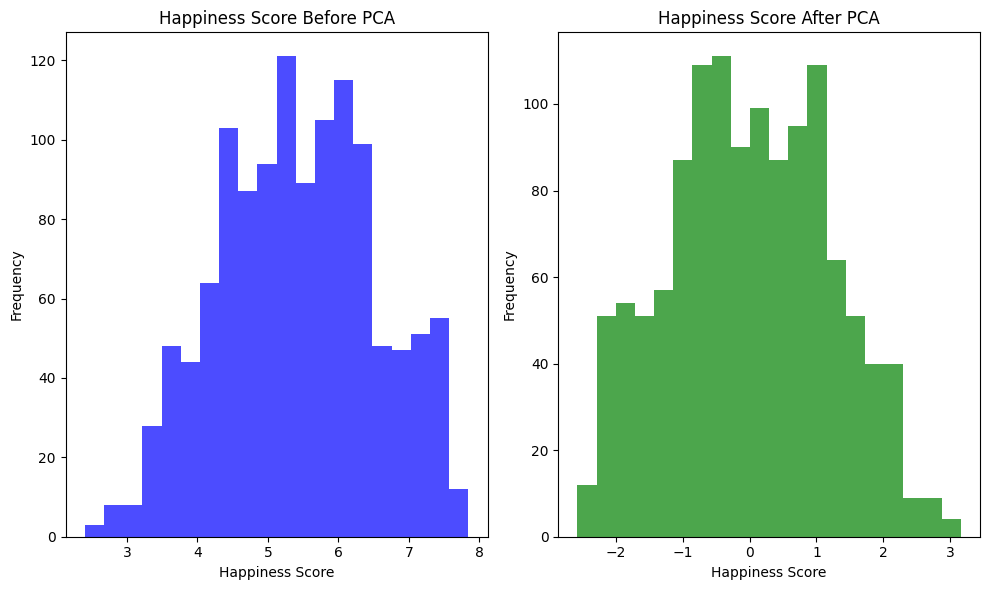

In [50]:
# Vẽ biểu đồ cho cột 'Happiness Score' trước khi PCA
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df_cleaned['Happiness Score'], bins=20, color='blue', alpha=0.7)
plt.title('Happiness Score Before PCA')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')

# Vẽ biểu đồ cho cột 'Happiness Score' sau khi PCA
plt.subplot(1, 2, 2)
plt.hist(df_pca['Happiness Score_PCA'], bins=20, color='green', alpha=0.7)
plt.title('Happiness Score After PCA')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

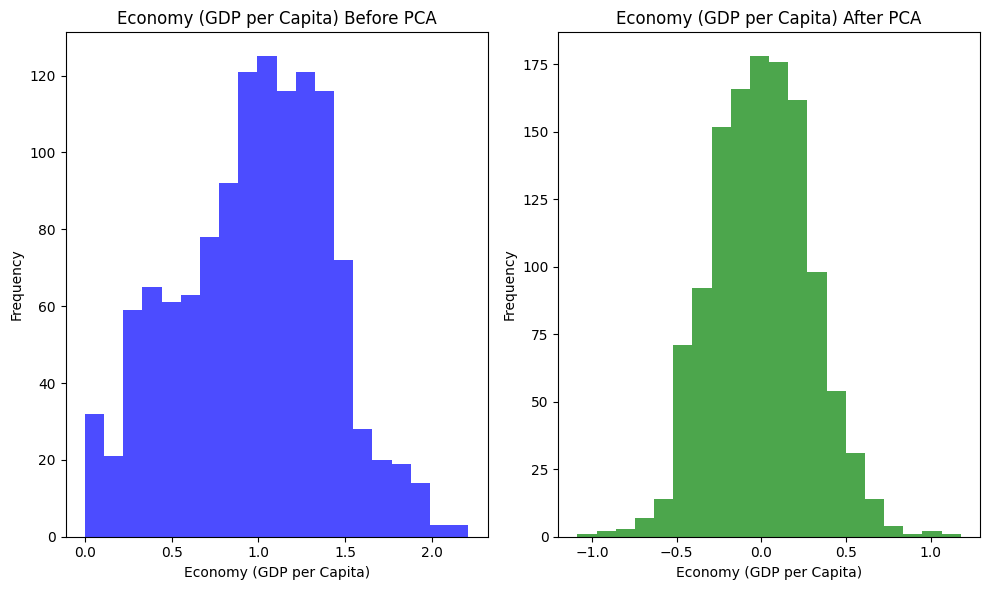

In [51]:
# Vẽ biểu đồ cho cột 'Economy (GDP per Capita)' trước khi PCA
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df_cleaned['Economy (GDP per Capita)'], bins=20, color='blue', alpha=0.7)
plt.title('Economy (GDP per Capita) Before PCA')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Frequency')

# Vẽ biểu đồ cho cột 'Economy (GDP per Capita)' sau khi PCA
plt.subplot(1, 2, 2)
plt.hist(df_pca['Economy (GDP per Capita)_PCA'], bins=20, color='green', alpha=0.7)
plt.title('Economy (GDP per Capita) After PCA')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 3.6 Biến đổi, rời rạc hóa dữ liệu

- Gắn nhãn cho cột Country

In [52]:
# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Áp dụng LabelEncoder cho cột 'Country'
df_pca['Country'] = label_encoder.fit_transform(df_pca['Country'])

In [53]:
df_pca.head()

,Happiness Score_PCA,Economy (GDP per Capita)_PCA,Country,year,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,-2.252062,-0.256062,168,2015,1.34951,0.94143,0.66557,0.41978,0.29678
1,-2.199478,-0.337091,72,2015,1.40223,0.94784,0.62877,0.14145,0.43630
2,-2.169540,-0.320642,45,2015,1.36058,0.87464,0.64938,0.48357,0.34139
3,-2.196445,-0.200284,132,2015,1.33095,0.88521,0.66973,0.36503,0.34699
4,-2.068984,-0.296026,28,2015,1.32261,0.90563,0.63297,0.32957,0.45811


- Chuẩn hóa các cột còn lại theo phương pháp Z-score normalization

In [54]:
# Các cột cần chuẩn hóa
columns_to_normalize = ['Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']

# Tiến hành chuẩn hóa
df_pca[columns_to_normalize] = df_pca[columns_to_normalize].apply(zscore)

# Kiểm tra kết quả
display(df_pca.head())

,Happiness Score_PCA,Economy (GDP per Capita)_PCA,Country,year,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,-2.252062,-0.256062,168,2015,0.960153,1.381798,1.455200,2.609167,0.823962
1,-2.199478,-0.337091,72,2015,1.120180,1.408369,1.216781,0.096541,2.031711
2,-2.169540,-0.320642,45,2015,0.993755,1.104939,1.350309,3.185032,1.210127
3,-2.196445,-0.200284,132,2015,0.903815,1.148754,1.482152,2.114911,1.258603
4,-2.068984,-0.296026,28,2015,0.878500,1.233399,1.243992,1.794796,2.220509


# 4. Xây dựng các mô hình cho bài toán hồi quy (Regression)
Chúng ta sẽ xây dựng các mô hình hồi quy để dự báo Happiness Score. Ba mô hình được lựa chọn bao gồm Linear Regression, Random Forest Regressor và K-Nearest Neighbors (KNN). Mục tiêu của chúng ta là sử dụng các mô hình này để dự đoán Happiness Score dựa trên các yếu tố ảnh hưởng.

1. **Feedforward Neural Network (FNN)**: Mạng nơ-ron truyền thẳng là một mô hình học sâu được cấu thành từ các lớp nơ-ron, trong đó thông tin chỉ di chuyển một chiều từ lớp đầu vào đến lớp đầu ra. FNN có khả năng học được các biểu diễn phức tạp của dữ liệu và khám phá các mối quan hệ phi tuyến tính giữa các biến độc lập và Happiness Score.

2. **Random Forest Regressor**: Mô hình Random Forest là một phương pháp học máy dựa trên cây quyết định, nó có khả năng xử lý các mối quan hệ phi tuyến tính và tương tác giữa các biến độc lập.

3. **K-Nearest Neighbors (KNN)**: KNN là một thuật toán học máy đơn giản dùng cho cả phân loại và hồi quy. Trong hồi quy, KNN dự đoán giá trị của một điểm dữ liệu bằng cách tính trung bình của các giá trị của những điểm láng giềng gần nhất của nó. KNN không học một mô hình tường minh mà thay vào đó "nhớ" toàn bộ dữ liệu huấn luyện và sử dụng nó để đưa ra dự đoán.

Chúng ta sẽ huấn luyện các mô hình này trên tập dữ liệu đã được tiền xử lý từ EDA và đánh giá hiệu suất của từng mô hình để chọn ra mô hình tốt nhất cho bài toán dự báo Happiness Score.

## 4.1. Sự tương quan giữa các biến

In [55]:
df_pca.dtypes

Happiness Score_PCA              float64
Economy (GDP per Capita)_PCA     float64
Country                            int32
year                               int64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
dtype: object

In [56]:
print("Số dòng x cột của tập dataframe hiện tại:")
display(df_pca.shape)

# Đếm số lượng dòng dữ liệu có cột bị NULL hoặc rỗng
num_rows_with_null = len(df_pca[df_pca.isnull().any(axis=1)])

print(f"Số lượng dòng dữ liệu có cột bị NULL hoặc rỗng: {num_rows_with_null}")


Số dòng x cột của tập dataframe hiện tại:


(1229, 9)

Số lượng dòng dữ liệu có cột bị NULL hoặc rỗng: 0


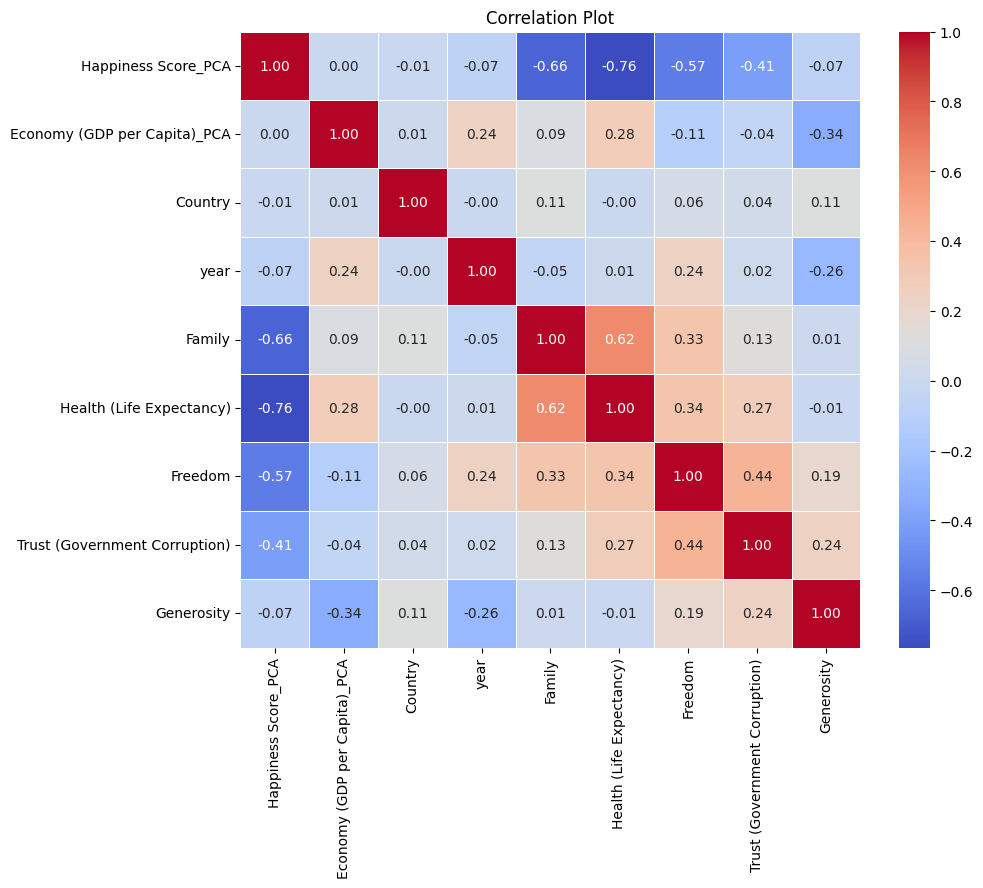

In [57]:
# Tạo ma trận tương quan
corr_matrix = df_pca.corr()

# Vẽ biểu đồ tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()


- Có sự tương quan khá cao giữa Family và Health, ta có thể loại bỏ 1 trong 2 cột để tránh hiện tượng đa cộng tuyến khi xây dựng mô hình
- Trong thực tế, thuộc tính Country có vẻ không có giá trị gì trong việc dự báo chỉ số hạnh phúc, và theo như biểu đồ tương quan, nó cũng không có mối quan hệ tuyến tính nào với các thuộc tính còn lại. Vì thế chúng ta có thể loại bỏ nó

In [58]:
df_pca.drop(columns=['Country'])

df_pca.drop(columns=['Family'])

,Happiness Score_PCA,Economy (GDP per Capita)_PCA,Country,year,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,-2.252062,-0.256062,168,2015,1.381798,1.455200,2.609167,0.823962
1,-2.199478,-0.337091,72,2015,1.408369,1.216781,0.096541,2.031711
2,-2.169540,-0.320642,45,2015,1.104939,1.350309,3.185032,1.210127
3,-2.196445,-0.200284,132,2015,1.148754,1.482152,2.114911,1.258603
4,-2.068984,-0.296026,28,2015,1.233399,1.243992,1.794796,2.220509
...,...,...,...,...,...,...,...,...
1224,1.741889,1.037017,21,2022,-1.359970,0.842501,-0.259594,-1.641224
1225,2.210107,0.399366,148,2022,-0.605542,1.166440,3.730564,-0.126344
1226,2.382285,0.683602,194,2022,-1.401422,-0.725368,-0.232512,-0.827517
1227,2.290727,1.178980,92,2022,0.094999,-2.189576,-0.873465,-1.035272


**Nhận xét:** Có vẻ chúng ta có thể sử dụng tất cả các thuộc tính để xây dựng mô hình dự đoán chỉ số Happiness

## 4.2. Chia dữ liệu thành tập Train và Test

In [59]:
# Chia dữ liệu thành features (X) và target (y)
X = df_pca.drop('Happiness Score_PCA', axis=1)
y = df_pca['Happiness Score_PCA']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.3. FNN (Feedforward Neural Network) Model

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# Xây dựng mô hình với learning rate tùy chỉnh
custom_optimizer = Adam(learning_rate=0.001)  # Đặt learning rate ở đây

# Xây dựng mô hình với các điều chỉnh khác
model = keras.Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),  # Thêm lớp Dropout với tỷ lệ là 0.2
    Dense(64, activation='relu'),
    Dropout(0.2),  # Thêm lớp Dropout với tỷ lệ là 0.2
    Dense(32, activation='relu'),
    Dropout(0.2),  # Thêm lớp Dropout với tỷ lệ là 0.2
    Dense(1)
])


f:\Download_Python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
# Biên dịch mô hình với tối ưu hóa tùy chỉnh
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train_scaled, y_train, epochs=200, verbose=1, batch_size=32, validation_split=0.2)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.1249 - val_loss: 0.3635
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4931 - val_loss: 0.3252
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4427 - val_loss: 0.3138
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4074 - val_loss: 0.2695
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3836 - val_loss: 0.2617
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3743 - val_loss: 0.2818
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3736 - val_loss: 0.2658
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3715 - val_loss: 0.2426
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3553 - val_loss: 0.2892
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3072 - val_loss: 0.2291
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3204 - val_loss: 0.2327
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3

In [63]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# Tính toán các độ đo đánh giá
mse_fnn = mean_squared_error(y_test, y_pred)
rmse_fnn = np.sqrt(mse_fnn)
mae_fnn = mean_absolute_error(y_test, y_pred)
r2_fnn = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse_fnn)
print('Root Mean Squared Error (RMSE):', rmse_fnn)
print('Mean Absolute Error (MAE):', mae_fnn)
print('R-squared (R2):', r2_fnn)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Mean Squared Error (MSE): 0.16584582167839013
Root Mean Squared Error (RMSE): 0.4072417238918308
Mean Absolute Error (MAE): 0.30866359647801184
R-squared (R2): 0.8808824773239236


## 4.4. Random Forest Regressor Model

In [64]:
# Khởi tạo và huấn luyện mô hình Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

In [65]:
rf_regressor.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf_regressor.predict(X_test)

In [66]:
# Đánh giá hiệu suất của mô hình
mse_rfr = mean_squared_error(y_test, y_pred)
rmse_rfr = np.sqrt(mse_rfr)
mae_rfr = mean_absolute_error(y_test, y_pred)
r2_rfr = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_rfr)
print("Root Mean Squared Error (RMSE):", rmse_rfr)
print("Mean Absolute Error (MAE):", mae_rfr)
print("R-squared (R²):", r2_rfr)

Mean Squared Error (MSE): 0.1842908993555396
Root Mean Squared Error (RMSE): 0.42929115918632615
Mean Absolute Error (MAE): 0.33269590607085436
R-squared (R²): 0.8676344380532657


## 4.5. K-Neighbors (KNN) Model

In [67]:
knn_model = KNeighborsRegressor()  # Chọn số láng giềng K=5
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [68]:
# Bước 3: Dự đoán trên tập kiểm tra và đánh giá mô hình
y_pred = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred)
mae_knn = mean_absolute_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)

print(f"MSE: {mse_knn}")
print(f"MAE: {mae_knn}")
print(f"R-squared: {r2_knn}")

MSE: 0.28996037541110226
MAE: 0.41549100490344254
R-squared: 0.7917381261484255


- Kết quả của mô hình quá thấp, tiến hành tinh chỉnh lại

In [69]:
# Thiết lập các giá trị cần thử cho n_neighbors
param_grid = {'n_neighbors': [1, 3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric': ['euclidean', 'manhattan', 'minkowski']}

In [70]:
# Tạo mô hình KNN
knn_model = KNeighborsRegressor()

In [71]:
# Tìm kiếm siêu tham số tốt nhất bằng GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [72]:
# In ra siêu tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [73]:
# Dự đoán trên tập kiểm tra bằng mô hình đã tinh chỉnh
y_pred_tuned = grid_search.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print("MSE after tuning:", mse_tuned)


MSE after tuning: 0.052480699472550366


In [74]:
# Tạo mô hình KNN với các tham số tốt nhất
best_knn_model = KNeighborsRegressor(algorithm="auto", metric= "manhattan", n_neighbors = 1, weights = 'uniform')

In [75]:
best_knn_model.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=1)

In [76]:
# Bước 3: Dự đoán trên tập kiểm tra và đánh giá mô hình
y_pred = best_knn_model.predict(X_test)
# Đánh giá hiệu suất của mô hình
mse_knn = mean_squared_error(y_test, y_pred)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("Mean Absolute Error (MAE):", mae_knn)
print("R-squared (R²):", r2_knn)

Mean Squared Error (MSE): 0.052480699472550366
Root Mean Squared Error (RMSE): 0.22908666367239794
Mean Absolute Error (MAE): 0.161358186124404
R-squared (R²): 0.962306129595471


## 4.6. Lựa chọn model tốt nhất cho bài toán

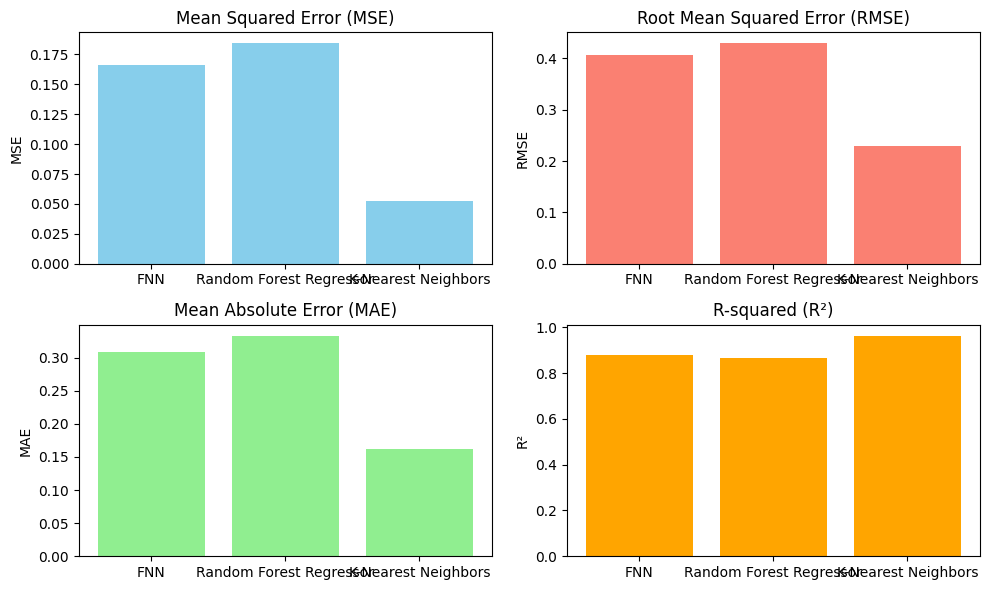

In [77]:
# Chỉ số đánh giá của ba mô hình
models = ['FNN', 'Random Forest Regressor', 'K-Nearest Neighbors']
mse_scores = [mse_fnn, mse_rfr, mse_knn]
rmse_scores = [rmse_fnn, rmse_rfr, rmse_knn]
mae_scores = [mae_fnn, mae_rfr, mae_knn]
r2_scores = [r2_fnn, r2_rfr, r2_knn]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(models, mse_scores, color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

plt.subplot(2, 2, 2)
plt.bar(models, rmse_scores, color='salmon')
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')

plt.subplot(2, 2, 3)
plt.bar(models, mae_scores, color='lightgreen')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

plt.subplot(2, 2, 4)
plt.bar(models, r2_scores, color='orange')
plt.title('R-squared (R²)')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

- Dựa vào các kết quả, K-Neighbors (KNN) là model tốt nhất

In [78]:
# Convert the KNN model to ONNX format
initial_type = [('float_input', FloatTensorType([None, X.shape[1]]))]
onnx_model = convert_sklearn(best_knn_model, initial_types=initial_type)

# Save the ONNX model to a file
onnx_file_path = "best-model-regression.onnx"
with open(onnx_file_path, "wb") as f:
    f.write(onnx_model.SerializeToString())